<a href="https://colab.research.google.com/github/a00572092/Actividad-5---Extracci-n-de-caracteristicas/blob/main/Actividad_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
%pip install funpymodeling
!pip install --upgrade numpy funpymodeling

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl
from google.colab import files

In [14]:
df = pd.read_excel('/content/microretailer_mit_lift_lab.xlsx')
df

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),19.053536,-98.233822,Eugene’s Compostura,1 Photo,Tailor,...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),19.053561,-98.234142,Frutas y verduras Angy,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),19.058655,-98.232300,Libélula,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2331576513 19.0592929035),19.059293,-98.233158,Quality fix,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,"November 12, 2022",2022-11-12 22:15:08 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2338639604 19.0595846029),19.059585,-98.233864,Artesanías Los Pinos,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2413f06e-15cc-4a6f-8e83-5224c6824b12,"November 3, 2022",2022-11-03 16:50:48 UTC,Emilio Garza,SRID=4326;POINT(-98.1940658722 19.0431145635),19.043115,-98.194066,July Store,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,962bf5a6-1eff-4874-a627-9cd8e3ca27b4,"November 3, 2022",2022-11-03 16:28:15 UTC,Emilio Garza,SRID=4326;POINT(-98.1938023854 19.0427938182),19.042794,-98.193802,Miscelánea rubí,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,9ff658db-4dc5-48b6-aa0b-5c6668bb6720,"November 3, 2022",2022-11-03 16:28:14 UTC,Emilio Garza,SRID=4326;POINT(-98.1934387078 19.0428094171),19.042809,-98.193439,La fonda,1 Photo,Micro-restaurant (aka. fondita),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,e88aa9c1-dc8b-4180-99a1-2e0118ad905d,"November 3, 2022",2022-11-03 16:18:37 UTC,Francisco Adán,SRID=4326;POINT(-98.193818 19.042558),19.042558,-98.193818,"Birria de Res ""Hermanos Negreros 2"" estilo Tij...",1 Photo,Micro-restaurant (aka. fondita),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 106 entries, _record_id to 235_email
dtypes: float64(23), int64(2), object(81)
memory usage: 141.7+ KB


In [16]:
df.isnull().sum()

_record_id                                0
_title                                    0
_server_updated_at                        0
_updated_by                               0
_geometry                                 0
                                       ... 
234_willingness_participate_workshop     73
318_shopkeeper_name                     123
319_shopkeepers_last_name               125
236_whatsapp                            129
235_email                               142
Length: 106, dtype: int64

In [17]:
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns] = df[object_columns].fillna(df[object_columns].mode().iloc[0])

In [18]:
num_columns = df.select_dtypes(include=['float64']).columns
df[num_columns] = df[num_columns].fillna(df[num_columns].mean().iloc[0])

In [19]:
num2_columns = df.select_dtypes(include=['int64']).columns
df[num2_columns] = df[num2_columns].fillna(df[num2_columns].mean().iloc[0])

In [20]:
df.isnull().sum().sum()

0

In [21]:
df2 = df.copy()

In [22]:
df2num = df2.select_dtypes(include=['number'])

In [23]:
#Método desviación estandar para eliminar los outliers6
y = df2num
limite_superior = y.mean() + 3*y.std()
limite_inferior = y.mean() - 3*y.std()
print("Límite superior permitido" , limite_superior)
print("\nLímite inferior permitido" , limite_inferior)

Límite superior permitido _latitude                                            1.911117e+01
_longitude                                          -9.809030e+01
97_number_of_customers_in_store                      6.591777e+00
268_number_fridges                                   1.289046e+01
104_how_many_shelves_does_the_micro_retailer_have    5.581292e+01
2_current_permanent_employees                        3.501865e+01
4_number_permanent_employees_last_year               3.721062e+01
103_number_own_fridges                               3.517781e+01
145_number_direct_competitors                        3.393583e+01
24_burnout                                           3.458367e+01
271_card_fee                                         1.904531e+01
272_card_days_receive_money                          3.820015e+01
273_platform_extra_charge                            1.904531e+01
274_platform_fee                                     1.904531e+01
275_platform_days_receive_money                   

In [24]:
#Conversion atipico-nulo
df3 = df2num[(y <= limite_superior) & (y >=limite_inferior)]
df3

,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,...,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products,236_whatsapp
0,19.053536,-98.233822,2.0,0.0,4.0,2.000000,2.000000,19.045305,3.000000,19.045305,...,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,0.000000,19.045305
1,19.053561,-98.234142,0.0,4.0,8.0,1.000000,1.000000,19.045305,4.000000,19.045305,...,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,NaN,19.045305
2,19.058655,-98.232300,0.0,0.0,24.0,2.000000,2.000000,19.045305,0.000000,19.045305,...,10.000000,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,NaN,19.045305
3,19.059293,-98.233158,0.0,0.0,2.0,1.000000,1.000000,19.045305,4.000000,19.045305,...,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,0.000000,19.045305
4,19.059585,-98.233864,0.0,0.0,16.0,0.000000,0.000000,19.045305,0.000000,19.045305,...,15.000000,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,0.000000,19.045305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,19.043115,-98.194066,1.0,0.0,5.0,19.045305,19.045305,19.045305,19.045305,19.045305,...,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305
167,19.042794,-98.193802,1.0,5.0,5.0,19.045305,19.045305,19.045305,19.045305,19.045305,...,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305
168,19.042809,-98.193439,3.0,1.0,1.0,19.045305,19.045305,19.045305,19.045305,19.045305,...,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305
169,19.042558,-98.193818,0.0,1.0,1.0,19.045305,19.045305,19.045305,19.045305,19.045305,...,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305


In [25]:
df3.isnull().sum().sum()

53

In [26]:
df4=df3.fillna(round(df3.mean(),1))
df4

,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,...,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products,236_whatsapp
0,19.053536,-98.233822,2.0,0.0,4.0,2.000000,2.000000,19.045305,3.000000,19.045305,...,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,0.000000,19.045305
1,19.053561,-98.234142,0.0,4.0,8.0,1.000000,1.000000,19.045305,4.000000,19.045305,...,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,13.400000,19.045305
2,19.058655,-98.232300,0.0,0.0,24.0,2.000000,2.000000,19.045305,0.000000,19.045305,...,10.000000,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,13.400000,19.045305
3,19.059293,-98.233158,0.0,0.0,2.0,1.000000,1.000000,19.045305,4.000000,19.045305,...,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,0.000000,19.045305
4,19.059585,-98.233864,0.0,0.0,16.0,0.000000,0.000000,19.045305,0.000000,19.045305,...,15.000000,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,0.000000,19.045305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,19.043115,-98.194066,1.0,0.0,5.0,19.045305,19.045305,19.045305,19.045305,19.045305,...,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305
167,19.042794,-98.193802,1.0,5.0,5.0,19.045305,19.045305,19.045305,19.045305,19.045305,...,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305
168,19.042809,-98.193439,3.0,1.0,1.0,19.045305,19.045305,19.045305,19.045305,19.045305,...,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305
169,19.042558,-98.193818,0.0,1.0,1.0,19.045305,19.045305,19.045305,19.045305,19.045305,...,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305


In [27]:
df5 = pd.concat([df2, df2.select_dtypes(exclude=['object'])], axis=1)

In [28]:
df5

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products,236_whatsapp
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),19.053536,-98.233822,Eugene’s Compostura,1 Photo,Tailor,...,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,0.000000,19.045305
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),19.053561,-98.234142,Frutas y verduras Angy,1 Photo,Grocery store (aka. nanostore),...,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,60.000000,19.045305
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),19.058655,-98.232300,Libélula,1 Photo,Grocery store (aka. nanostore),...,10.000000,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,60.000000,19.045305
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2331576513 19.0592929035),19.059293,-98.233158,Quality fix,1 Photo,Grocery store (aka. nanostore),...,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,0.000000,19.045305
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,"November 12, 2022",2022-11-12 22:15:08 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2338639604 19.0595846029),19.059585,-98.233864,Artesanías Los Pinos,1 Photo,Grocery store (aka. nanostore),...,15.000000,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,0.000000,19.045305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2413f06e-15cc-4a6f-8e83-5224c6824b12,"November 3, 2022",2022-11-03 16:50:48 UTC,Emilio Garza,SRID=4326;POINT(-98.1940658722 19.0431145635),19.043115,-98.194066,July Store,1 Photo,Grocery store (aka. nanostore),...,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305
167,962bf5a6-1eff-4874-a627-9cd8e3ca27b4,"November 3, 2022",2022-11-03 16:28:15 UTC,Emilio Garza,SRID=4326;POINT(-98.1938023854 19.0427938182),19.042794,-98.193802,Miscelánea rubí,1 Photo,Grocery store (aka. nanostore),...,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305
168,9ff658db-4dc5-48b6-aa0b-5c6668bb6720,"November 3, 2022",2022-11-03 16:28:14 UTC,Emilio Garza,SRID=4326;POINT(-98.1934387078 19.0428094171),19.042809,-98.193439,La fonda,1 Photo,Micro-restaurant (aka. fondita),...,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305
169,e88aa9c1-dc8b-4180-99a1-2e0118ad905d,"November 3, 2022",2022-11-03 16:18:37 UTC,Francisco Adán,SRID=4326;POINT(-98.193818 19.042558),19.042558,-98.193818,"Birria de Res ""Hermanos Negreros 2"" estilo Tij...",1 Photo,Micro-restaurant (aka. fondita),...,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305,19.045305


In [29]:
df5.isnull().sum().sum()

0

In [30]:
freq_tbl(df5)

                               _record_id  frequency  percentage  \
0    dff2998e-af74-4de6-8efd-488aca24e67b          1    0.005848   
1    53c25f08-1c1b-4c1c-97d5-b45c940735cc          1    0.005848   
2    af5c48b5-a916-47a6-aacc-1128ea1e728e          1    0.005848   
3    4790411b-df1d-44f0-a659-6d99e26ae765          1    0.005848   
4    e70db20a-25db-412b-9a71-7df285c92a3d          1    0.005848   
..                                    ...        ...         ...   
166  75bcc709-90ff-4db7-bb82-293f2f72f3ae          1    0.005848   
167  bd59c8b6-81cb-4698-8cfd-dbab7f01ef21          1    0.005848   
168  94b1c6bc-1fb8-4895-aacc-c2604dc12b93          1    0.005848   
169  d9ff4194-657e-4fb4-b5f4-b7e8b350a646          1    0.005848   
170  bf720ff0-3b7d-47ed-ba49-f5d4bfb7293c          1    0.005848   

     cumulative_perc  
0           0.005848  
1           0.011696  
2           0.017544  
3           0.023392  
4           0.029240  
..               ...  
166         0.976608  

In [31]:
df6=df5.select_dtypes(include=['object'])
df6

,_record_id,_title,_server_updated_at,_updated_by,_geometry,228_store_name,229_store_picture,232_type_of_store,108_does_the_micro_retailer_has_a_barred_window_,99_does_the_micro_retailer_exhibits_products_outside_,...,260_technology_scalable,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),Eugene’s Compostura,1 Photo,Tailor,yes,no,...,Totalmente de acuerdo,Totalmente de acuerdo,De acuerdo,De acuerdo,Totalmente en desacuerdo,Totalmente de acuerdo,no,Andrea,Aguila,Colada2241@hotmail.com
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),Frutas y verduras Angy,1 Photo,Grocery store (aka. nanostore),no,yes,...,Totalmente de acuerdo,Totalmente de acuerdo,De acuerdo,De acuerdo,Totalmente en desacuerdo,Totalmente de acuerdo,no,Andrea,Aguila,Colada2241@hotmail.com
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),Libélula,1 Photo,Grocery store (aka. nanostore),yes,no,...,Totalmente de acuerdo,Totalmente de acuerdo,De acuerdo,De acuerdo,Totalmente en desacuerdo,Totalmente de acuerdo,no,Andrea,Aguila,Colada2241@hotmail.com
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2331576513 19.0592929035),Quality fix,1 Photo,Grocery store (aka. nanostore),no,no,...,Totalmente de acuerdo,Totalmente de acuerdo,De acuerdo,De acuerdo,Totalmente en desacuerdo,Totalmente de acuerdo,no,Andrea,Aguila,Colada2241@hotmail.com
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,"November 12, 2022",2022-11-12 22:15:08 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2338639604 19.0595846029),Artesanías Los Pinos,1 Photo,Grocery store (aka. nanostore),yes,no,...,Totalmente de acuerdo,Totalmente de acuerdo,De acuerdo,De acuerdo,Totalmente en desacuerdo,Totalmente de acuerdo,no,Andrea,Aguila,Colada2241@hotmail.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2413f06e-15cc-4a6f-8e83-5224c6824b12,"November 3, 2022",2022-11-03 16:50:48 UTC,Emilio Garza,SRID=4326;POINT(-98.1940658722 19.0431145635),July Store,1 Photo,Grocery store (aka. nanostore),yes,no,...,Totalmente de acuerdo,Totalmente de acuerdo,De acuerdo,De acuerdo,Totalmente en desacuerdo,Totalmente de acuerdo,no,Andrea,Aguila,Colada2241@hotmail.com
167,962bf5a6-1eff-4874-a627-9cd8e3ca27b4,"November 3, 2022",2022-11-03 16:28:15 UTC,Emilio Garza,SRID=4326;POINT(-98.1938023854 19.0427938182),Miscelánea rubí,1 Photo,Grocery store (aka. nanostore),no,no,...,Totalmente de acuerdo,Totalmente de acuerdo,De acuerdo,De acuerdo,Totalmente en desacuerdo,Totalmente de acuerdo,no,Andrea,Aguila,Colada2241@hotmail.com
168,9ff658db-4dc5-48b6-aa0b-5c6668bb6720,"November 3, 2022",2022-11-03 16:28:14 UTC,Emilio Garza,SRID=4326;POINT(-98.1934387078 19.0428094171),La fonda,1 Photo,Micro-restaurant (aka. fondita),yes,no,...,Totalmente de acuerdo,Totalmente de acuerdo,De acuerdo,De acuerdo,Totalmente en desacuerdo,Totalmente de acuerdo,no,Andrea,Aguila,Colada2241@hotmail.com
169,e88aa9c1-dc8b-4180-99a1-2e0118ad905d,"November 3, 2022",2022-11-03 16:18:37 UTC,Francisco Adán,SRID=4326;POINT(-98.193818 19.042558),"Birria de Res ""Hermanos Negreros 2"" estilo Tij...",1 Photo,Micro-restaurant (aka. fondita),no,no,...,Totalmente de acuerdo,Totalmente de acuerdo,De acuerdo,De acuerdo,Totalmente en desacuerdo,Totalmente de acuerdo,no,Andrea,Aguila,Colada2241@hotmail.com


In [32]:
variables = df6.iloc[:,:20]

for variable in variables:
  print(variable)
print(len(variable))

_record_id
_title
_server_updated_at
_updated_by
_geometry
228_store_name
229_store_picture
232_type_of_store
108_does_the_micro_retailer_has_a_barred_window_
99_does_the_micro_retailer_exhibits_products_outside_
102_does_the_micro_retailer_sells_fresh_products_
184_store_devices
pictures_of_shelves_if_possible
hola_somos_estudiantes_del_tec_de_monterrey_estamos_realiz
le_comento_que_toda_esta_informacin_es_confidencial
233_date_establishment
5_change_store_space_last_year
6_change_employees_average_salary_last_year
20_reviews_finances_monthly
49_inventory_records
20


In [33]:
#Análisis univariado de una variable categórica en específico
table1= freq_tbl(variables['184_store_devices'])
table1

,184_store_devices,frequency,percentage,cumulative_perc
0,Smartphone,54,0.315789,0.315789
1,Analog cash register,16,0.093567,0.409357
2,POS system (i.e. computer + bar code scanner +...,9,0.052632,0.461988
3,POS system (i.e. computer + bar code scanner +...,9,0.052632,0.514620
4,"Analog cash register,Smartphone",8,0.046784,0.561404
5,"Security cameras,Smartphone",7,0.040936,0.602339
6,"Dataphone (i.e. card payments),Security camera...",5,0.029240,0.631579
7,Security cameras,5,0.029240,0.660819
8,Dataphone (i.e. card payments),4,0.023392,0.684211
9,POS system (i.e. computer + bar code scanner +...,4,0.023392,0.707602


In [34]:
#Filtro de los valores más reelevantes de la variables categórica seleccionada
filter= table1[table1['frequency']>1]
filter

,184_store_devices,frequency,percentage,cumulative_perc
0,Smartphone,54,0.315789,0.315789
1,Analog cash register,16,0.093567,0.409357
2,POS system (i.e. computer + bar code scanner +...,9,0.052632,0.461988
3,POS system (i.e. computer + bar code scanner +...,9,0.052632,0.514620
4,"Analog cash register,Smartphone",8,0.046784,0.561404
5,"Security cameras,Smartphone",7,0.040936,0.602339
6,"Dataphone (i.e. card payments),Security camera...",5,0.029240,0.631579
7,Security cameras,5,0.029240,0.660819
8,Dataphone (i.e. card payments),4,0.023392,0.684211
9,POS system (i.e. computer + bar code scanner +...,4,0.023392,0.707602


In [35]:
filterindex=filter.set_index('184_store_devices')
filterindex.head

<bound method NDFrame.head of                                                     frequency  percentage  \
184_store_devices                                                           
Smartphone                                                 54    0.315789   
Analog cash register                                       16    0.093567   
POS system (i.e. computer + bar code scanner + ...          9    0.052632   
POS system (i.e. computer + bar code scanner + ...          9    0.052632   
Analog cash register,Smartphone                             8    0.046784   
Security cameras,Smartphone                                 7    0.040936   
Dataphone (i.e. card payments),Security cameras...          5    0.029240   
Security cameras                                            5    0.029240   
Dataphone (i.e. card payments)                              4    0.023392   
POS system (i.e. computer + bar code scanner + ...          4    0.023392   
Analog cash register,Security cameras         

Text(0, 0.5, 'Frecuencia')

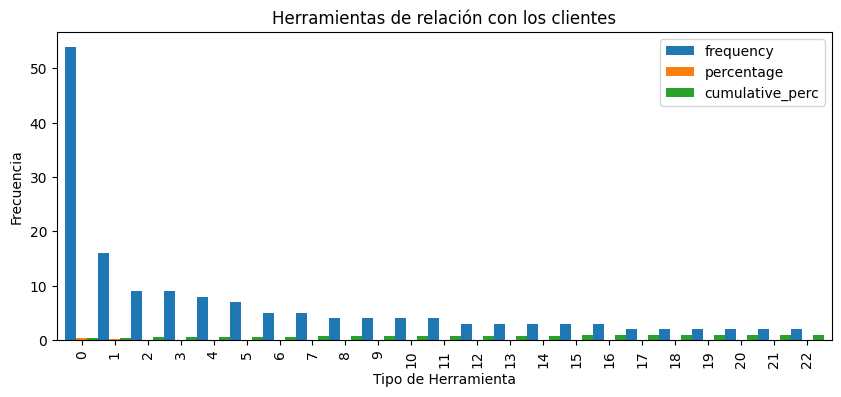

In [42]:
filter.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Herramientas de relación con los clientes')
plt.xlabel('Tipo de Herramienta')
plt.ylabel('Frecuencia')

<Axes: >

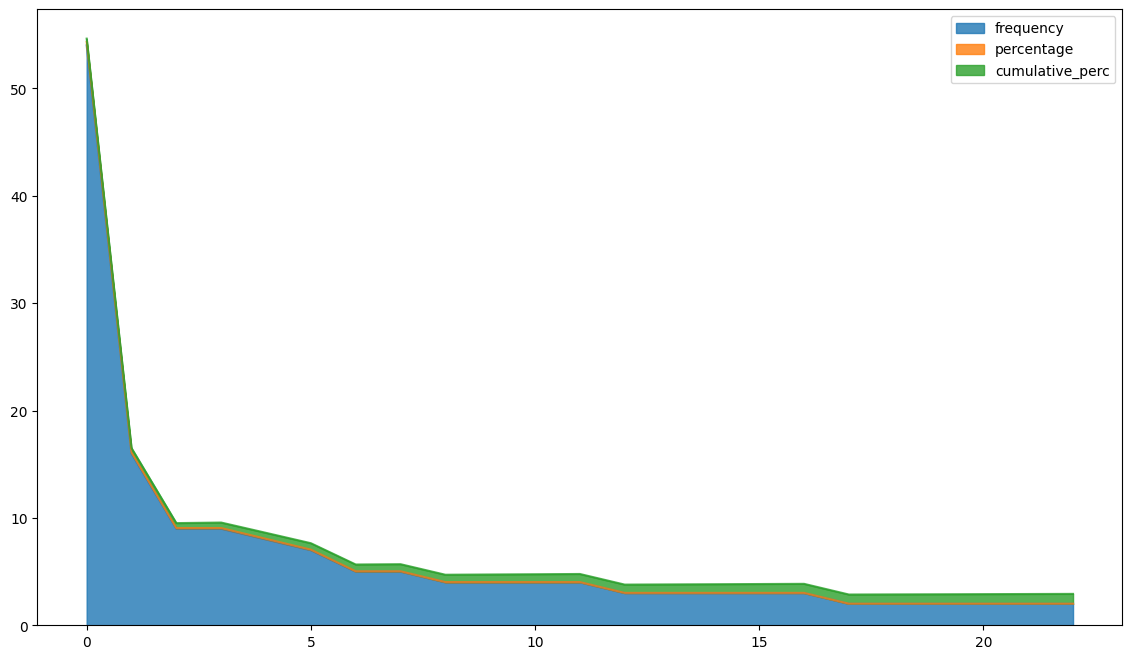

In [37]:
filter.plot(kind='area', figsize=(14,8),alpha = 0.8)

<Axes: ylabel='frequency'>

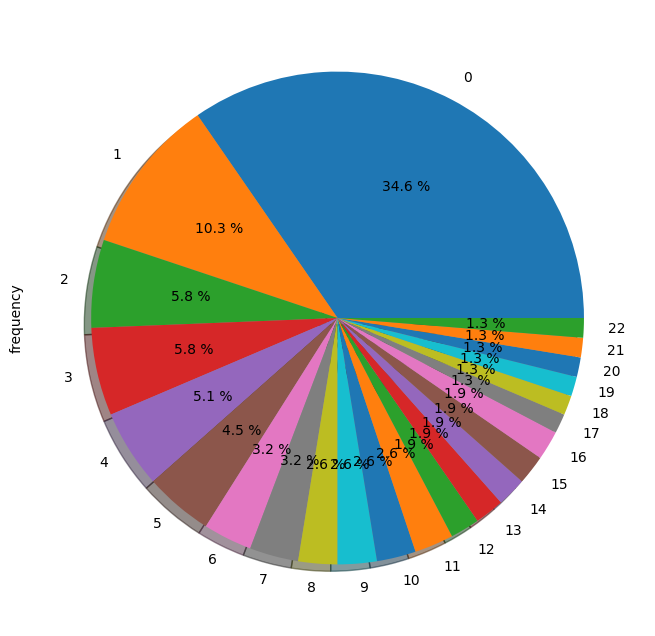

In [39]:
filter["frequency"].plot(kind='pie', figsize=(14,8), shadow=True, autopct="%0.1f %%")

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

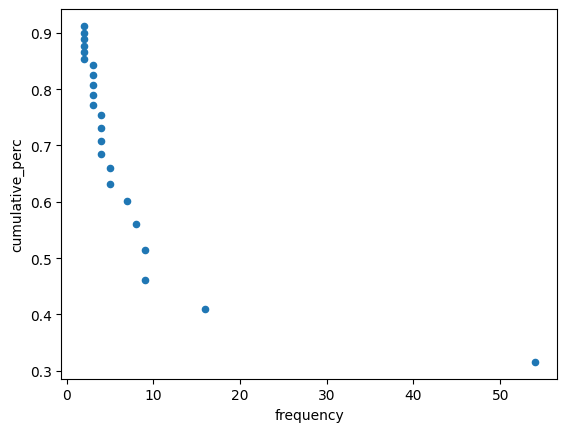

In [40]:
filter.plot("frequency", "cumulative_perc", kind="scatter")